# Introdução

## Carregando Pacontes Necessários

In [1]:
pkg load communications;

## Leitura de uma imagem no GNU Octave

In [2]:
X = imread('imgs/cman.png');

A imagem ''cman.png'' é uma imagem em tons de cinza, representada por uma matriz $2 \times 2$. Neste exemplo trata-se uma foto do cameraman. Para ver as dimensões da imagem, basta ver o tamanho da matriz.

In [3]:
size(X)

ans =

   256   256



A imagem em questão possui $256 \times 256$ pixels em tons de cinza. Podemos ver o tipo da variável usando a função ''typeinfo''.

In [4]:
typeinfo(X)

ans = uint8 matrix


A variável $X$ armazena uma matriz $256 \times 256$ de inteiros de 8 bits sem sinal. Logo os valores da matriz estão no intervalo $[0,255]$, representando uma escala de tons de cinza, onde $0$ representa a cor preta e $255$ a cor branca. Podemos ver outras informações sobre o arquivo da imagem usando a função ''imfinfo''.

In [5]:
imfinfo('imgs/cman.png')

ans =

  scalar structure containing the fields:

    Filename = /home/leoca/ee/ufsj/aulas/notebooks/aev/imgs/cman.png
    FileModDate =  2-Aug-2019 18:29:51
    FileSize =  42078
    Format = PNG
    FormatVersion = 
    Width =  256
    Height =  256
    BitDepth =  8
    ColorType = grayscale
    DelayTime = 0
    DisposalMethod = 
    LoopCount = 0
    ByteOrder = undefined
    Gamma = 0
    Chromaticities = [](1x0)
    Comment = 
    Quality =  75
    Compression = undefined
    Colormap = [](0x0)
    Orientation =  1
    ResolutionUnit = Centimeter
    XResolution =  472.44
    YResolution =  472.44
    Software = 
    Make = 
    Model = 
    DateTime = 
    ImageDescription = 
    Artist = 
    Copyright = 
    DigitalCamera =

      scalar structure containing the fields:


    GPSInfo =

      scalar structure containing the fields:





Para ver a imagem podemos utilizar a função ''imshow''. Esta função esperar receber uma matriz que representa uma imagem e não uma matriz qualquer. Desta forma, a matriz deverá ser constituída por elementos do tipo ''uint8''. Outra opção seria utilizar a função ''image'', neste caso você deverá definir o ''colormap'' (mapa de cores).

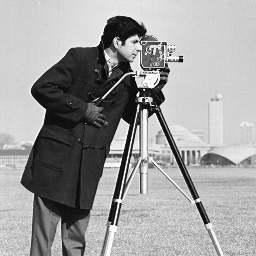

In [6]:
imshow(X);

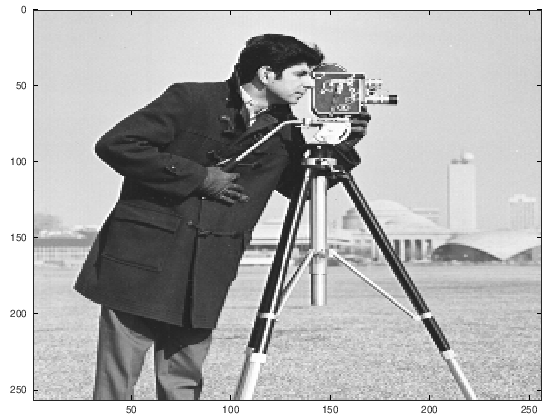

In [7]:
image(X); cmap = repmat([0:255]'/255,1,3); colormap(cmap);

Vamos agora visualiza a diferença entre pixels vizinhos ao longo das linhas da imagem.

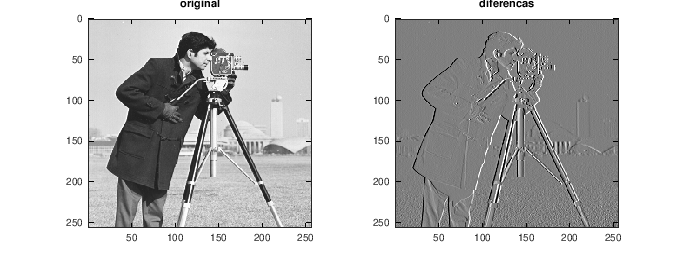

In [8]:
X = double(X);
figure("position",get(0,"screensize")./[1 1 2 3]) 
subplot(1,2,1); colormap(cmap);
image(X); title('original');
subplot(1,2,2); colormap(cmap);
image(diff(X,[],2)+128); title('diferencas'); 

Note que os valores das diferenças são menores do que os valores dos pixels da imagem. Afinal, em uma imagem real, pixels vizinhos são parecidos (exceto nas bordas, entre objetos distintos de uma cena).

In [9]:
X(1,1:20)
Xdiff = diff(X,[],2);
Xdiff(1,1:20)

ans =

 Columns 1 through 13:

   210   212   213   213   211   211   213   213   214   210   211   212   211

 Columns 14 through 20:

   211   211   211   217   210   211   210

ans =

   2   1   0  -2   0   2   0   1  -4   1   1  -1   0   0   0   6  -7   1  -1   0



Se utilizarmos o valor inicial de cada uma das linha e os valores das diferenenças podemos reconstruir a imagem. Entretanto os pixels vizinho na vertical também são parecidos. Poderíamos então utilizar outra forma de varredura da imagem.

![Formas de varredura de uma imagem](files/imgs/imgscans.jpg)

fonte: Herrero, R., Cadirola, M., & Ingle, V. K. (2014). Effects of preprocessing applied to the compression of ultraspectral images. Algorithms and Technologies for Multispectral, Hyperspectral, and Ultraspectral Imagery XX. doi:10.1117/12.2048639

Por questão de simplicidade, iremos escolher o método progressivo (g). Vamos também guardar o valor do primeiro pixel na variável $X1$.

In [10]:
idodd = 1:2:size(X,2);
X(idodd,:) = fliplr ( X(idodd,:) );
X = X'(:);
X1 = X(1);

Vamos pomarar agora o histograma da imagem original com o histograma das diferenças.

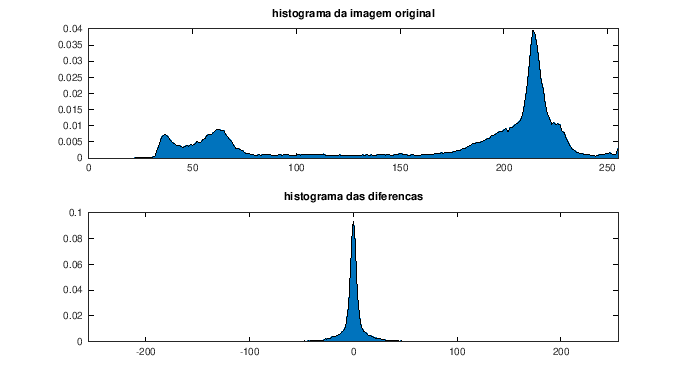

In [11]:
Xdiff = diff(X);
hx = hist(X,[0:255]);
hxd = hist(Xdiff,[-255:1:255]);
figure("position",get(0,"screensize")./[1 1 2 2])
subplot(2,1,1); 
area([0:255],hx./sum(hx));
ax = axis; ax(1)=0; ax(2)=255; axis(ax);
title('histograma da imagem original');
subplot(2,1,2); 
area([-255:1:255],hxd./sum(hxd));
axd = axis; axd(1)=-255; axd(2)=255; axis(axd);
title('histograma das diferencas');

Agora vamos criar um código de Huffman para armazenar as diferenças e verificar qual seria o ganho de compressão da imagem se adotássemos esta estratégia simples.

Tamanho da figura original = 524288 bits
Tamanho da figura comprimida = 361041 bits
Taxa de compressao = 0.69


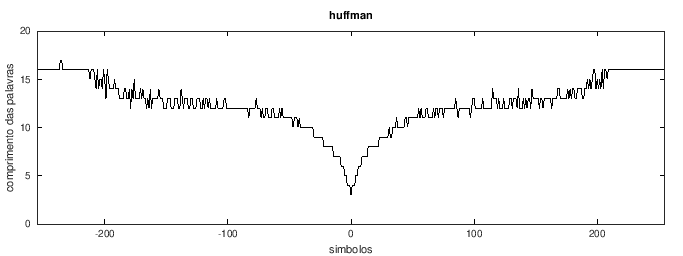

In [13]:
hxdadd1 = hxd + ones(size(hxd));
dict = huffmandict([-255:1:255], hxdadd1./sum(hxdadd1));
len = []; for i = 1:length(dict), len(i)=length(dict{i}); endfor;
figure("position",get(0,"screensize")./[1 1 2 3])
plot([-255:1:255],len,'k-','linewidth',2); axh=axis; axh(1)=-255; axh(2)=255; axis(axh);
xlabel('simbolos'); ylabel('comprimento das palavras'); title('huffman');

tamfigfinal = sum(hxd.*len) + 8;
printf('Tamanho da figura original = %d bits\nTamanho da figura comprimida = %d bits\nTaxa de compressao = %.2f\n', 8*256*256, tamfigfinal, tamfigfinal/(8*256*256));
